In [1]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
#from tensorflow.keras.datasets import mnist

In [2]:
import mnist
mnist.init()

Download complete.
Save complete.


In [3]:
x_train, y_train, x_test, y_test = mnist.load()
print(x_train)
print(y_train)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[5 0 4 ... 5 6 8]


In [4]:
train_filter = np.where(y_train == 3)
test_filter = np.where(y_test == 3)
X_train, Y_train = x_train[train_filter], y_train[train_filter]
X_test, Y_test = x_test[test_filter], y_test[test_filter]
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)
X_train.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[3 3 3 ... 3 3 3]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[3 3 3 ... 3 3 3]


(6131, 784)

In [29]:
pca = PCA(0.50)
lower_dimensional_data = pca.fit_transform(X_train.data)
pca.n_components_


9

In [30]:
approximation = pca.inverse_transform(lower_dimensional_data)

In [31]:
X_Train = np.asarray(X_train.data)
type(approximation)

numpy.ndarray

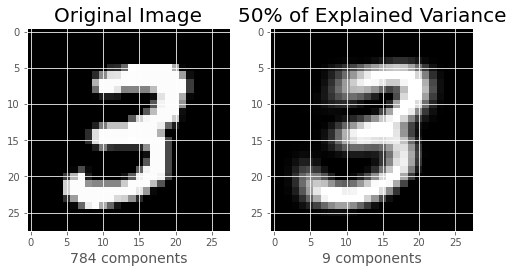

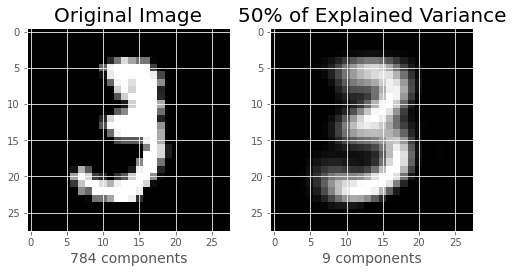

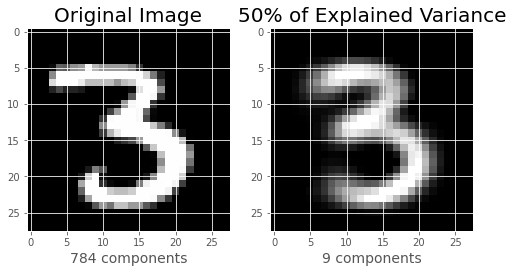

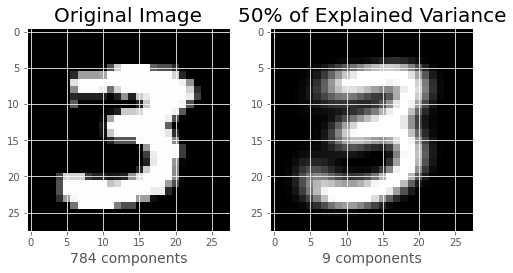

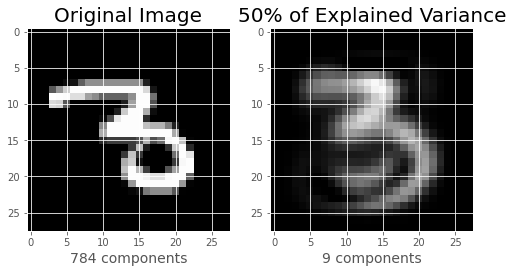

In [33]:
for i in range (0,5):
    plt.figure(figsize=(8,4));
# Original Image
    plt.subplot(1, 2, 1);
    plt.imshow(X_Train[i].reshape(28,28), cmap = plt.cm.gray, interpolation='nearest',clim=(0, 255));
    plt.xlabel('784 components', fontsize = 14)
    plt.title('Original Image', fontsize = 20);

# 154 principal components
    plt.subplot(1, 2, 2);
    plt.imshow(approximation[i].reshape(28, 28), cmap = plt.cm.gray, interpolation='nearest', clim=(0, 255));
    plt.xlabel('9 components', fontsize = 14)
    plt.title('50% of Explained Variance', fontsize = 20);

Text(0.5, 1.0, 'Scree Plot')

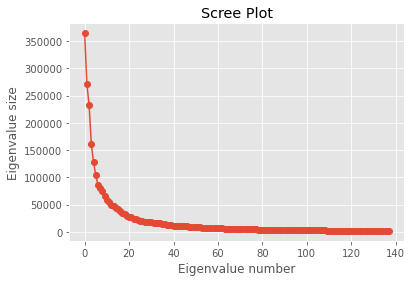

In [18]:
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")